# **Title**: Classification of PIMA



---

The Pima are a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In the recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop the highest prevalence of type 2 diabetes and for this reason they have been subject of many studies. 

## **Section 1**  Problem statement
* Type: **Supervised binary-class classification**
* Output: **Positive  (1)  or negative (0)**
* Features: **["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]**
 * Number of times pregnant
 * Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 * Diastolic blood pressure (mm Hg)
 * Triceps skin fold thickness (mm)
 * 2-Hour serum insulin (mu U/ml)
 * Body mass index (weight in kg/(height in m)^2)
 * Diabetes pedigree function
 * Age (years)
* The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)
* number of samples: **768** 
* [more info](http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)


## **Section 2**  Python requirements

```
Required pachages: sys, numpy, seaborn, matplotlib, pandas, scikit-learn
```

>Importing the installed packages


In [1]:
import os
import pandas as pd
import numpy as np
from numpy import unique
 
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler as Scaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

## **Section 3**:  Data Analysis

* Load the dataset
* Exploring data (optional for model development run)

In [19]:
# Load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
dataset =pd.read_csv(url , header=None)
dataset.columns = [
    "NumTimesPrg", "PlGlcConc", "BloodP",
    "SkinThick", "TwoHourSerIns", "BMI",
    "DiPedFunc", "Age", "HasDiabetes"]

### Data analysis

In [20]:
# get the values
values = dataset.values
X, y = values[:, :-1], values[:, -1]
# gather details
n_rows = X.shape[0]
n_cols = X.shape[1]
classes = unique(y)
n_classes = len(classes)
# summarize
print('N Examples: %d' % n_rows)
print('N Inputs: %d' % n_cols)
print('N Classes: %d' % n_classes)
print('Classes: %s' % classes)
print('Class Breakdown:')
# class breakdown
breakdown = ''
for c in classes:
	total = len(y[y == c])
	ratio = (total / float(len(y))) * 100
	print(' - Class %s: %d (%.5f%%)' % (str(c), total, ratio))

N Examples: 768
N Inputs: 8
N Classes: 2
Classes: [0. 1.]
Class Breakdown:
 - Class 0.0: 500 (65.10417%)
 - Class 1.0: 268 (34.89583%)


In [21]:
corr = dataset.corr()
print(corr)

               NumTimesPrg  PlGlcConc    BloodP  SkinThick  TwoHourSerIns  \
NumTimesPrg       1.000000   0.129459  0.141282  -0.081672      -0.073535   
PlGlcConc         0.129459   1.000000  0.152590   0.057328       0.331357   
BloodP            0.141282   0.152590  1.000000   0.207371       0.088933   
SkinThick        -0.081672   0.057328  0.207371   1.000000       0.436783   
TwoHourSerIns    -0.073535   0.331357  0.088933   0.436783       1.000000   
BMI               0.017683   0.221071  0.281805   0.392573       0.197859   
DiPedFunc        -0.033523   0.137337  0.041265   0.183928       0.185071   
Age               0.544341   0.263514  0.239528  -0.113970      -0.042163   
HasDiabetes       0.221898   0.466581  0.065068   0.074752       0.130548   

                    BMI  DiPedFunc       Age  HasDiabetes  
NumTimesPrg    0.017683  -0.033523  0.544341     0.221898  
PlGlcConc      0.221071   0.137337  0.263514     0.466581  
BloodP         0.281805   0.041265  0.239528     

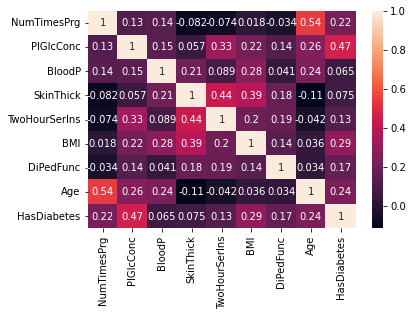

In [22]:
# showing the visulization
sns.heatmap(corr, annot = True)

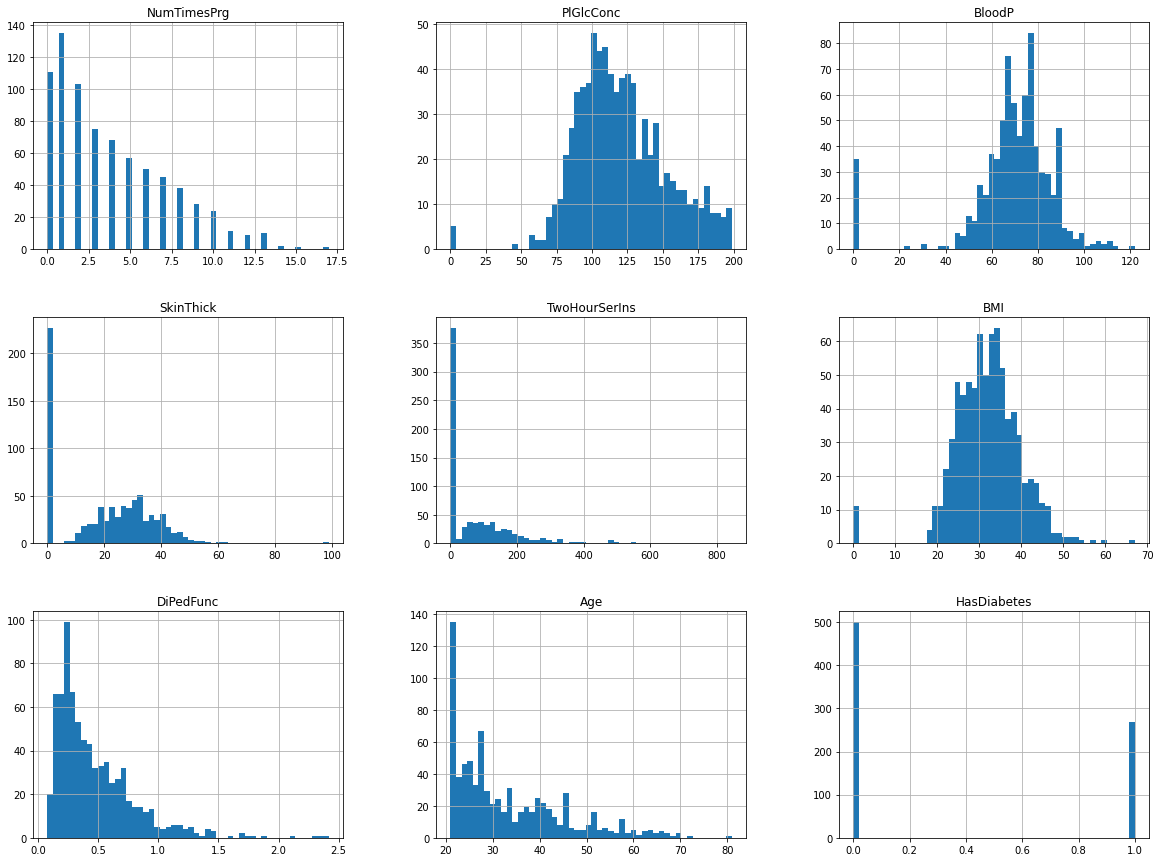

In [23]:
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

In [24]:
print(dataset.describe())

       NumTimesPrg   PlGlcConc      BloodP   SkinThick  TwoHourSerIns  \
count   768.000000  768.000000  768.000000  768.000000     768.000000   
mean      3.845052  120.894531   69.105469   20.536458      79.799479   
std       3.369578   31.972618   19.355807   15.952218     115.244002   
min       0.000000    0.000000    0.000000    0.000000       0.000000   
25%       1.000000   99.000000   62.000000    0.000000       0.000000   
50%       3.000000  117.000000   72.000000   23.000000      30.500000   
75%       6.000000  140.250000   80.000000   32.000000     127.250000   
max      17.000000  199.000000  122.000000   99.000000     846.000000   

              BMI   DiPedFunc         Age  HasDiabetes  
count  768.000000  768.000000  768.000000   768.000000  
mean    31.992578    0.471876   33.240885     0.348958  
std      7.884160    0.331329   11.760232     0.476951  
min      0.000000    0.078000   21.000000     0.000000  
25%     27.300000    0.243750   24.000000     0.000000  


According to this plots, we know the following features has missing point (Since it does not make sense for them to be zero)

In [25]:
# handle missing data
Features_missing = ['BMI', 'BloodP', 'PlGlcConc','SkinThick','TwoHourSerIns']
for feature in Features_missing:
  median = dataset[feature].median()
  # Substitute it in the BMI column of the dataset where values are 0
  dataset[feature] = dataset[feature].replace(to_replace=0, value=median)

### Further exploring the data (Optional)

In [26]:
print(dataset.shape)

(768, 9)


In [27]:
print(dataset.groupby('HasDiabetes').size())

HasDiabetes
0    500
1    268
dtype: int64


In [28]:
print(dataset.head(10))

   NumTimesPrg  PlGlcConc  BloodP  SkinThick  TwoHourSerIns   BMI  DiPedFunc  \
0            6        148      72         35           30.5  33.6      0.627   
1            1         85      66         29           30.5  26.6      0.351   
2            8        183      64         23           30.5  23.3      0.672   
3            1         89      66         23           94.0  28.1      0.167   
4            0        137      40         35          168.0  43.1      2.288   
5            5        116      74         23           30.5  25.6      0.201   
6            3         78      50         32           88.0  31.0      0.248   
7           10        115      72         23           30.5  35.3      0.134   
8            2        197      70         45          543.0  30.5      0.158   
9            8        125      96         23           30.5  32.0      0.232   

   Age  HasDiabetes  
0   50            1  
1   31            0  
2   32            1  
3   21            0  
4   33   

In [29]:
print(dataset.describe())

       NumTimesPrg   PlGlcConc      BloodP   SkinThick  TwoHourSerIns  \
count   768.000000  768.000000  768.000000  768.000000     768.000000   
mean      3.845052  121.656250   72.386719   27.334635      94.652344   
std       3.369578   30.438286   12.096642    9.229014     105.547598   
min       0.000000   44.000000   24.000000    7.000000      14.000000   
25%       1.000000   99.750000   64.000000   23.000000      30.500000   
50%       3.000000  117.000000   72.000000   23.000000      31.250000   
75%       6.000000  140.250000   80.000000   32.000000     127.250000   
max      17.000000  199.000000  122.000000   99.000000     846.000000   

              BMI   DiPedFunc         Age  HasDiabetes  
count  768.000000  768.000000  768.000000   768.000000  
mean    32.450911    0.471876   33.240885     0.348958  
std      6.875366    0.331329   11.760232     0.476951  
min     18.200000    0.078000   21.000000     0.000000  
25%     27.500000    0.243750   24.000000     0.000000  


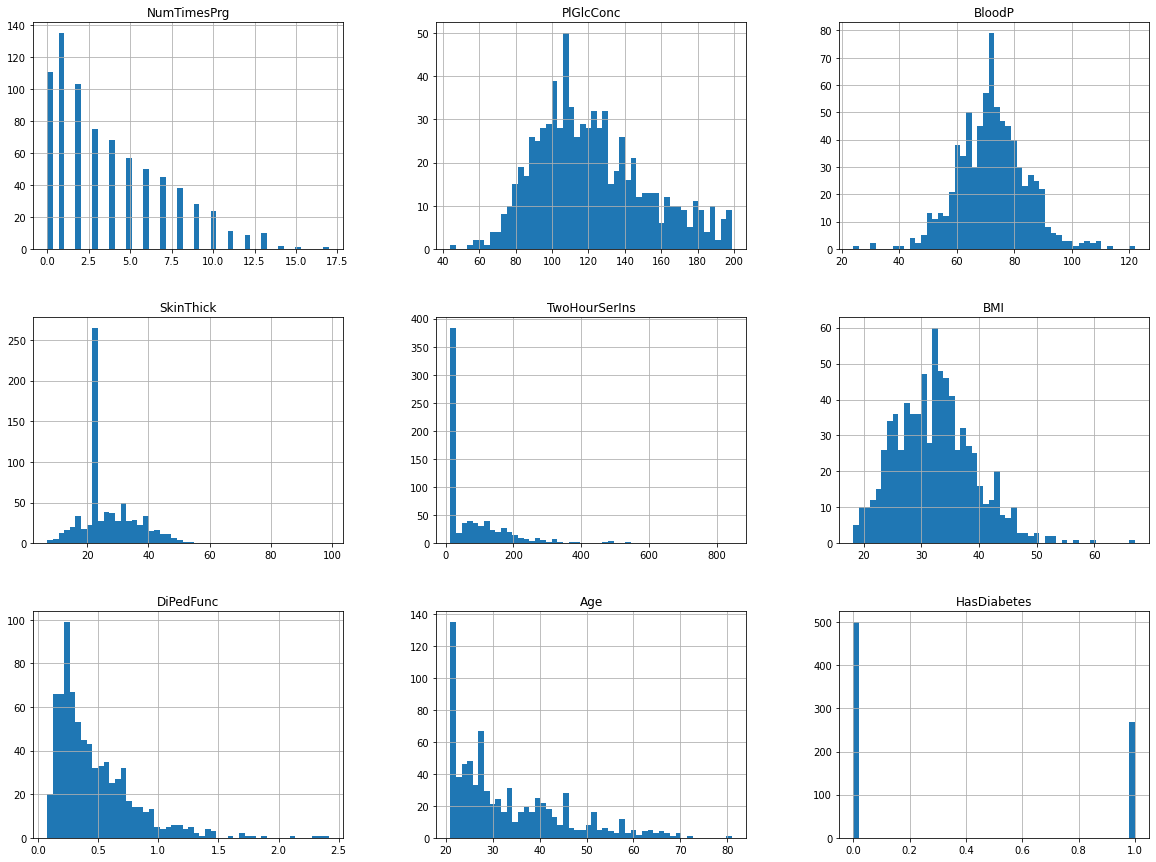

In [38]:
# Visulization 2
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

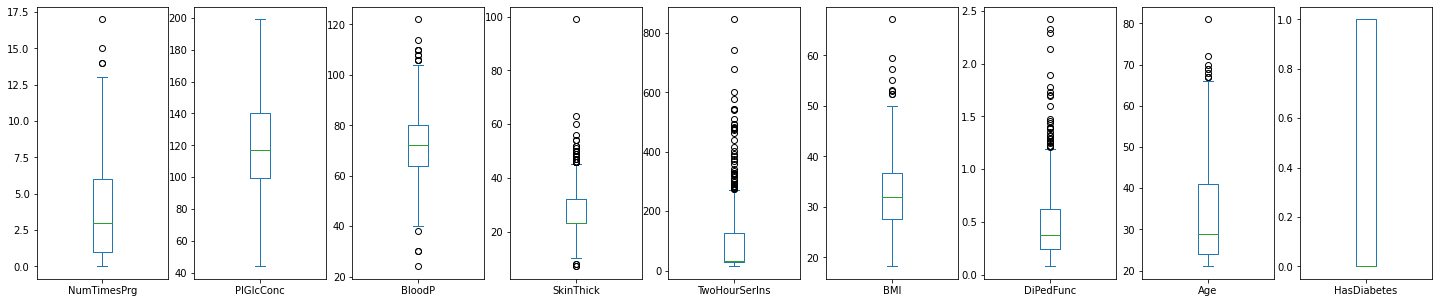

In [66]:
# Visulization 3
dataset.plot(kind='box', subplots=True, layout=(1,9), sharex=False, sharey=False,  figsize=(25, 5))
plt.show()

In [46]:
# checking for missing data
dataset.isna().sum()

NumTimesPrg      0
PlGlcConc        0
BloodP           0
SkinThick        0
TwoHourSerIns    0
BMI              0
DiPedFunc        0
Age              0
HasDiabetes      0
dtype: int64

## **Section 4**:  Modeling

* Split the train/test/validation
* Consdier the classification models:
> 1. Logistic Regression (LR)
> 2. Linear Support Vector Classifier (LSVC)
>3. K-Nearest Neighbors (KNN).
>4. Decision Tree Regressor (DTR).
>5. Gaussian Naive Bayes (NB).
>6. Support Vector Classifier (SVC).
>7. Random Forest Clasifier (RFC)
* Create cross-validation model


In [47]:
# Split-out validation dataset
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)
# Separate labels from the rest of the dataset
train_set_labels = train_set["HasDiabetes"].copy()
train_set = train_set.drop("HasDiabetes", axis=1)
test_set_labels = test_set["HasDiabetes"].copy()
test_set = test_set.drop("HasDiabetes", axis=1)
scaler = Scaler()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

### Creat models

In [48]:
# creat a list for list of models 
models = []

In [49]:
# All Models
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTR', DecisionTreeRegressor()))

In [50]:
# Prepare the configuration to run the test
seed = 7
results = []
names = []
X = train_set_scaled
Y = train_set_labels

### Create cross-validation model

In [54]:
# Every algorithm is tested and results are
# collected and printed
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (
        name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.747594 (0.041771)
KNN: 0.724907 (0.040235)
NB: 0.742570 (0.049322)
SVC: 0.750820 (0.036472)
LSVC: 0.760682 (0.034250)
RFC: 0.765442 (0.040781)
DTR: 0.693971 (0.037050)


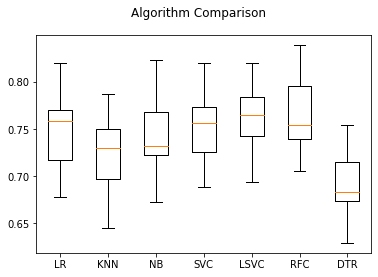

In [55]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [56]:
# hyper-parameter tunning
param_grid = {
    'C': [1.0, 10.0, 50.0],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'shrinking': [True, False],
    'gamma': ['auto', 1, 0.1],
    'coef0': [0.0, 0.1, 0.5]
}

In [59]:
model_best = SVC()

grid_search = GridSearchCV(model_best, param_grid, cv=10,scoring='accuracy')
grid_search.fit(train_set_scaled, train_set_labels)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1.0, 10.0, 50.0], 'coef0': [0.0, 0.1, 0.5],
                         'gamma': ['auto', 1, 0.1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'shrinking': [True, False]},
             scoring='accuracy')

In [61]:
# best hyper-parameters
grid_search.best_score_

0.7686938127974617

In [62]:
# Create an instance of the algorithm using parameters
# from best_estimator_ property
svc = grid_search.best_estimator_

# Use the whole dataset to train the model
X = np.append(train_set_scaled, test_set_scaled, axis=0)
Y = np.append(train_set_labels, test_set_labels, axis=0)

# Train the model
svc.fit(X, Y)

SVC(C=10.0, gamma=0.1)

## Section 5: Prediction
* Make prediction on SVC
* Evaluate the prediction

In [63]:
# We create a new (fake) person having the three most correated values high
new_df = pd.DataFrame([[6, 168, 72, 35, 0, 43.6, 0.627, 65]])

In [64]:
# We scale those values like the others
new_df_scaled = scaler.transform(new_df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [65]:
# We predict the outcome
prediction = svc.predict(new_df_scaled)
 # A value of "1" means that this person is likley to have type 2 diabetes
print(prediction)

[1]
